#📌 Extracción

In [ ]:
#importando las librerias necesarias
import requests
import json
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

df_clientes = pd.DataFrame(data)

df_clientes

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
df_flat = pd.json_normalize(data)
df_flat.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
#Cantidad de valores únicos por columna
df_flat.nunique()

,0
customerID,7267
Churn,3
customer.gender,2
customer.SeniorCitizen,2
customer.Partner,2
customer.Dependents,2
customer.tenure,73
phone.PhoneService,2
phone.MultipleLines,3
internet.InternetService,3


In [ ]:
# Para obtener los valores únicos y contarlos de todas las columnas
for col in df_flat.columns:
    print(f"Columna: {col}")
    print(df_flat[col].value_counts(dropna=False))
    print("-" * 40)

Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64
----------------------------------------
Columna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
----------------------------------------
Columna: customer.gender
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64
----------------------------------------
Columna: customer.SeniorCitizen
customer.SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64
----------------------------------------
Columna: customer.Partner
customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64
----------------------------------------
Columna: customer.Dependents
customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64
----------------------------------------
Columna: customer.tenure
customer.

In [ ]:
# Verificar si hay algún valor faltante en todo el DataFrame
print("\n¿Hay valores faltantes en el DataFrame? (any()):", df_flat.isnull().any().any())


¿Hay valores faltantes en el DataFrame? (any()): False


In [ ]:
# Contar valores faltantes en todo el DataFrame
print("\nConteo total de valores faltantes:", df_flat.isnull().sum().sum())


Conteo total de valores faltantes: 0


In [ ]:
# Contar los valores faltantes por columna
print("\nConteo de valores faltantes por columna:\n", df_flat.isnull().sum())


Conteo de valores faltantes por columna:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [ ]:
#Duplicados
print("Filas duplicadas: ", df_flat.duplicated().sum())

Filas duplicadas:  0


In [ ]:
# Detectar strings vacíos o espacios en blanco
vacios = df_flat.map(lambda x: isinstance(x, str) and x.strip() == '')
print(vacios.sum())

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64


#🔧 Transformación

De las columnas que deben ser numéricas, falta la columna "account.Charges.Total", la transformaremos a float.

In [ ]:
# Reemplazaremos espacios en blanco por NaN

In [ ]:
df_flat['account.Charges.Total'] = df_flat['account.Charges.Total'].replace(' ', np.nan)

# Transformamos a float
df_flat['account.Charges.Total'] = df_flat['account.Charges.Total'].astype(np.float32)
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
#vamos a eliminar las filas vacias de la columna 'Churn'

df_churn = df_flat[df_flat['Churn'].str.strip() != '']
df_churn.info()

#ahora tenemos 7043 filas, antes eran 7267. Se eliminaron 224 filas que no indicaban esta de Churn.

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

Los datos no tienen incoherencias, me parece que no son necesarias mas transformaciones.

**Crear columna "cuentas diarias"**

In [ ]:
cuentas_diarias=df_churn['account.Charges.Monthly']/30
df_churn['cuentas_diarias']=cuentas_diarias
df_churn.head(3)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

/tmp/ipython-input-16-1086660907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['cuentas_diarias']=cuentas_diarias


#📊 Carga y análisis

In [ ]:
df_churn.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300537,2.158723
std,0.368612,24.559481,30.090047,2266.771729,1.003002
min,0.000000,0.000000,18.250000,18.799999,0.608333
25%,0.000000,9.000000,35.500000,401.450012,1.183333
50%,0.000000,29.000000,70.350000,1397.475098,2.345000
75%,0.000000,55.000000,89.850000,3794.737549,2.995000
max,1.000000,72.000000,118.750000,8684.799805,3.958333


In [ ]:
# Describe columnas numéricas
numericas = df_churn[['customer.tenure','account.Charges.Monthly','account.Charges.Total','cuentas_diarias']].round(2)

#  Describe columnas categóricas
categoricas = df_churn[['Churn','customer.gender', 'customer.SeniorCitizen','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService','internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection', 'internet.TechSupport','internet.StreamingTV',
                        'internet.StreamingMovies','account.Contract','account.PaperlessBilling','account.PaymentMethod']]

In [ ]:
print("Describe variables numéricas:")
print(numericas.describe().round(2))

Describe variables numéricas:
       customer.tenure  account.Charges.Monthly  account.Charges.Total  \
count          7043.00                  7043.00                7032.00   
mean             32.37                    64.76                2283.30   
std              24.56                    30.09                2266.77   
min               0.00                    18.25                  18.80   
25%               9.00                    35.50                 401.45   
50%              29.00                    70.35                1397.48   
75%              55.00                    89.85                3794.74   
max              72.00                   118.75                8684.80   

       cuentas_diarias  
count          7043.00  
mean              2.16  
std               1.00  
min               0.61  
25%               1.18  
50%               2.34  
75%               2.99  
max               3.96  


In [ ]:
print("\nDescribe variables categóricas:")
print(categoricas.describe().round(2))


Describe variables categóricas:
       customer.SeniorCitizen
count                 7043.00
mean                     0.16
std                      0.37
min                      0.00
25%                      0.00
50%                      0.00
75%                      0.00
max                      1.00


# **📄Gráficos**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# **Grafico Clientes: Proporción de Evasión vs Permanencia - Periodo análisis 72 meses**

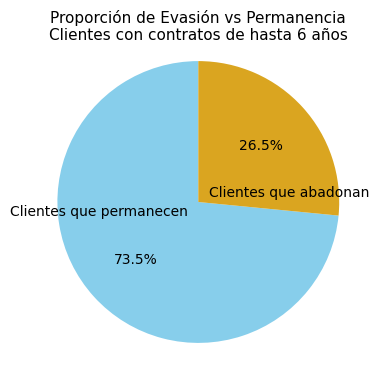

In [ ]:
# Conteo de valores
valores = df_churn['Churn'].value_counts()
etiquetas = valores.index
colores = ['skyblue', 'goldenrod']  # Personalizable
# Etiquetas personalizadas
etiquetas = ['Clientes que permanecen', 'Clientes que abadonan']

plt.figure(figsize=(4,4))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores, labeldistance=0.1)
plt.title('Proporción de Evasión vs Permanencia\nClientes con contratos de hasta 6 años',fontsize=11)

plt.axis('equal')
plt.savefig('Clientes_Proporcion_Evasion_Permanencia.png', dpi=120)
plt.show()


# **Gráficamente distribución de la evasión/abandono según variables categóricas, comparando porcentajes**

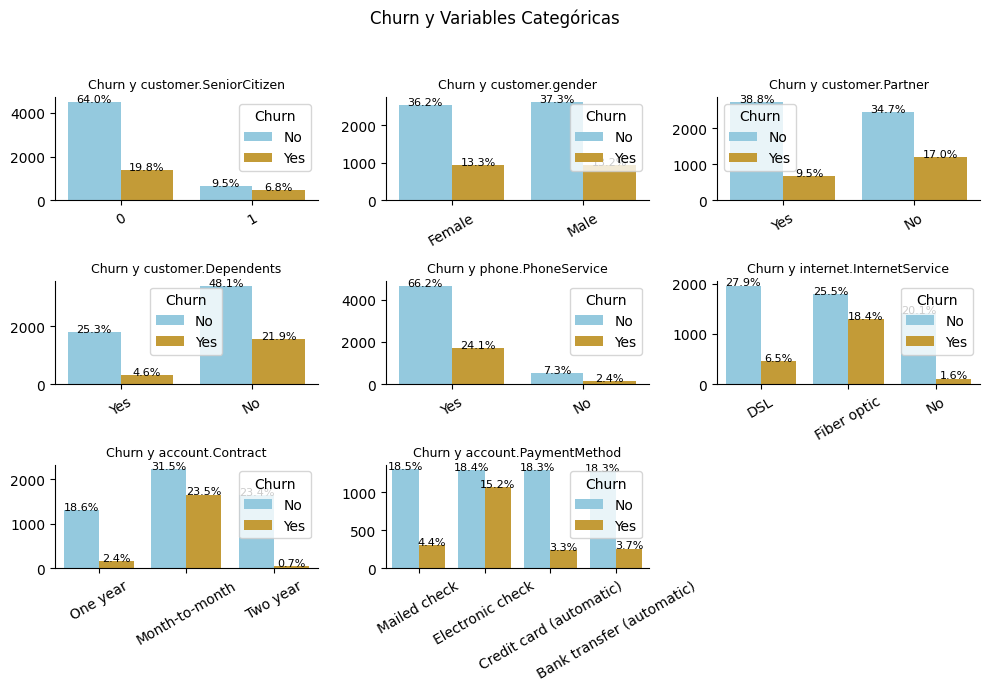

In [ ]:
# Variables a graficar
variables = ['customer.SeniorCitizen','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','internet.InternetService',
             'account.Contract','account.PaymentMethod']

# Crear figura: 3 columnas, 3 filas
fig, axes = plt.subplots(3, 3, figsize=(10, 7))  # Tamaño compacto

# Aplanar axes para indexarlo fácilmente
axes = axes.flatten()

# Plotear las 7 variables
for i, var in enumerate(variables):
    ax = axes[i]
    sns.countplot(data=df_churn, x=var, hue='Churn', palette=['skyblue', 'goldenrod'], ax=ax)
    ax.set_title(f'Churn y {var}', fontsize=9)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=30)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Agregar porcentajes sin mostrar ceros
    total = len(df_churn)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            porcentaje = 100 * height / total
            ax.text(p.get_x() + p.get_width()/2, height + 2, f'{porcentaje:.1f}%', ha='center', fontsize=8)

# Ocultar los 2 ejes sobrantes
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Título general
plt.suptitle('Churn y Variables Categóricas', fontsize=12)

# Ajustar espaciado para que quede todo compacto
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Churn_por_variables_categoricas_compacto.png', dpi=120, bbox_inches='tight')
plt.show()


# **Extra: Exclusión entre teléfono e internet**

In [ ]:
# Crear columna para comparar de forma excluyente
def tipo_servicio(row):
    if row['phone.PhoneService'] == 'Yes' and row['internet.InternetService'] == 'No':
        return 'Sólo Teléfono'
    elif row['phone.PhoneService'] == 'No' and row['internet.InternetService'] != 'No':
        return 'Sólo Internet'
    elif row['phone.PhoneService'] == 'Yes' and row['internet.InternetService'] != 'No':
        return 'Ambos'
    else:
        return 'Ninguno'

df_churn.loc[:, 'TipoServicio'] = df_churn.apply(tipo_servicio, axis=1)


/tmp/ipython-input-25-3375781881.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn.loc[:, 'TipoServicio'] = df_churn.apply(tipo_servicio, axis=1)


In [ ]:
df_churn.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,TipoServicio
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.299988,2.186667,Ambos
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.400024,1.996667,Ambos
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.850006,2.463333,Ambos
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.849976,3.266667,Ambos
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.399994,2.796667,Ambos


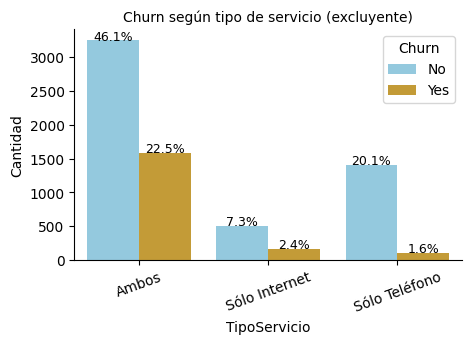

In [ ]:
plt.figure(figsize=(5,3))
ax = sns.countplot(data=df_churn, x='TipoServicio', hue='Churn', palette=['skyblue', 'goldenrod'])
plt.title('Churn según tipo de servicio (excluyente)',fontsize=10)
plt.ylabel('Cantidad')
plt.xticks(rotation=20)

# Eliminar marco superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir porcentajes (solo si son > 0)
total = len(df_churn)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        porcentaje = 100 * height / total
        ax.text(p.get_x() + p.get_width() / 2, height + 2, f'{porcentaje:.1f}%', ha='center', fontsize=9)


plt.savefig('Extra_Churn_segun_tipo_servicio_excluyente.png', dpi=120)
plt.show()


# **Gráficos variables numéricas**

In [46]:
import plotly.express as px

In [52]:
px.histogram (df_churn, x='customer.tenure',text_auto=True, color='Churn', barmode='group',
              color_discrete_map={'No permanecen':'goldenrod', 'Permanecen':'skyblue'},
              title='Evasión vs Antigüedad del contrato',width=600,height=400)



In [ ]:
fig = px.histogram(df_churn, x='account.Contract', color='Churn', facet_col='account.PaymentMethod', barmode='group',
    text_auto=True,  color_discrete_map={'Sí': 'goldenrod', 'No': 'skyblue'}, title='Evasión vs Permanencia por Tipo de Contrato y Método de Pago',
    width=1200, height=400)

# Eliminar el prefijo 'account.PaymentMethod=' de los títulos de las facetas
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()


In [ ]:
px.histogram (df_churn, x='customer.tenure',text_auto=True, color='Churn', barmode='group',
              color_discrete_map={'No permanecen':'goldenrod', 'Permanecen':'skyblue'},
              title='Evasión vs Antigüedad del contrato')

Churn y Senior Citizen

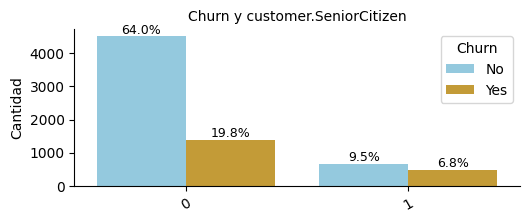

In [ ]:
# Variables a graficar
variables = ['customer.SeniorCitizen']

plt.figure(figsize=(10, 8))

for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    ax = sns.countplot(data=df_churn, x=var, hue='Churn', palette=['skyblue', 'goldenrod'])
    plt.title(f'Churn y {var}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=30)

    # Eliminar marco superior y derecho
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Añadir porcentajes sobre las barras (sin mostrar 0,0%)
    total = len(df_churn)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            porcentaje = 100 * height / total
            ax.text(
                p.get_x() + p.get_width()/2,
                height + 2,
                f'{porcentaje:.1f}%',
                ha='center', va='bottom', fontsize=9
            )

plt.tight_layout()
plt.savefig('Churn_y_Senior_Citizen.png', dpi=120)
plt.show()

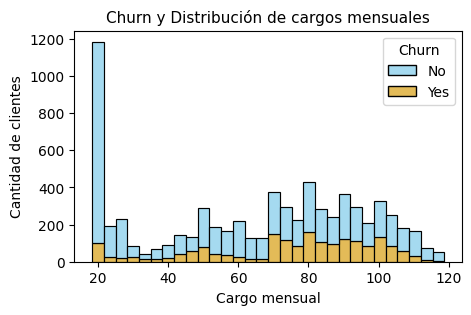

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df_churn, x='account.Charges.Monthly', hue='Churn', multiple='stack', palette=['skyblue', 'goldenrod'], bins=30)
plt.title('Churn y Distribución de cargos mensuales', fontsize=11)

plt.xlabel('Cargo mensual')
plt.ylabel('Cantidad de clientes')

plt.savefig('Churn_y_Distribucion_cargos_mensuales', dpi=120)
plt.show()

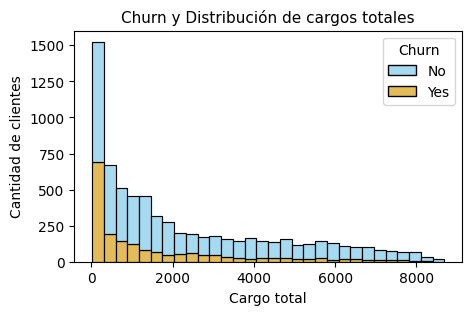

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df_churn, x='account.Charges.Total', hue='Churn', multiple='stack', palette=['skyblue', 'goldenrod'], bins=30)
plt.title('Churn y Distribución de cargos totales',fontsize=11)
plt.xlabel('Cargo total')
plt.ylabel('Cantidad de clientes')
plt.savefig('Churn_y_Distribucion_cargos_totales', dpi=120)
plt.show()

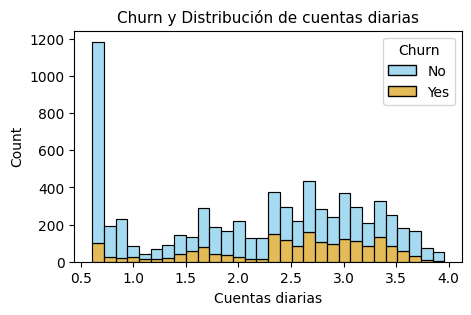

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df_churn, x='cuentas_diarias', hue='Churn', multiple='stack', palette=['skyblue', 'goldenrod'], bins=30)
plt.title('Churn y Distribución de cuentas diarias',fontsize=11)
plt.xlabel('Cuentas diarias')
plt.savefig('Churn_y_Distribucion_cuentas_diarias', dpi=120)
plt.show()

In [ ]:
px.scatter(df_churn, x='customer.tenure', y='account.Charges.Monthly', color='Churn',
              color_discrete_map={'No permanecen':'goldenrod', 'Permanecen':'skyblue'},
              title='Permanencia vs Cargos Mensuales por Churn',width=800,height=500)

Boxplot variables numéricas

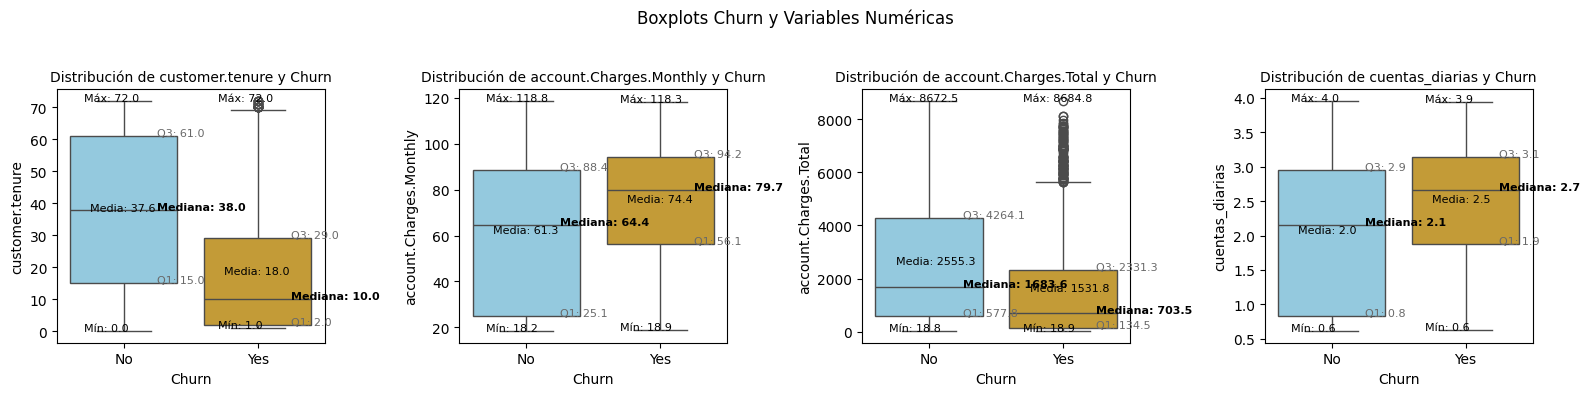

In [44]:
variables_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'cuentas_diarias']
plt.figure(figsize=(16, 4))

for i, var in enumerate(variables_numericas, 1):
    ax = plt.subplot(1, 4, i)

    sns.boxplot(data=df_churn, x='Churn', y=var, hue='Churn', palette=['skyblue', 'goldenrod'], legend=False)

    plt.title(f'Distribución de {var} y Churn', fontsize=10)
    plt.xlabel('Churn')
    plt.ylabel(var)

    # Recorrer cada grupo de 'Churn'
    for j, churn_valor in enumerate(df_churn['Churn'].unique()):
        data_filtrada = df_churn[df_churn['Churn'] == churn_valor][var].dropna()

        q1 = data_filtrada.quantile(0.25)
        q2 = data_filtrada.median()
        q3 = data_filtrada.quantile(0.75)
        mean = data_filtrada.mean()
        minimo = data_filtrada.min()
        maximo = data_filtrada.max()

        # Posición horizontal: 0 para primer box, 1 para el segundo (ajustar si hay más grupos)
        x_offset = j

        # Anotar valores en el gráfico
        ax.text(x_offset - 0.25, mean, f'Media: {mean:.1f}', color='black', fontsize=8)
        ax.text(x_offset + 0.25, q1, f'Q1: {q1:.1f}', color='dimgray', fontsize=8)
        ax.text(x_offset + 0.25, q2, f'Mediana: {q2:.1f}', color='black', fontsize=8, weight='bold')
        ax.text(x_offset + 0.25, q3, f'Q3: {q3:.1f}', color='dimgray', fontsize=8)
        ax.text(x_offset - 0.3, minimo, f'Mín: {minimo:.1f}', color='black', fontsize=8)
        ax.text(x_offset - 0.3, maximo, f'Máx: {maximo:.1f}', color='black', fontsize=8)

# Título general
plt.suptitle('Boxplots Churn y Variables Numéricas', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Boxplot_Churn_y_var_numericas.png', dpi=120)
plt.show()


# **Conclusiones**

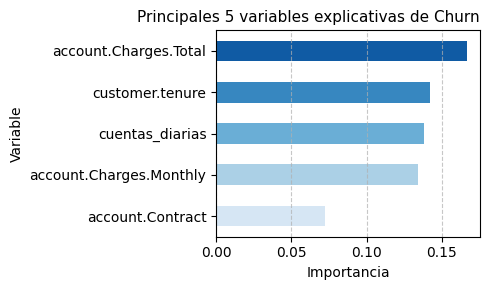

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Copia del dataframe para no modificar el original
df = df_churn.copy()

# Eliminar columnas no relevantes
df.drop(columns=['customerID'], inplace=True)

# Codificar variable target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Codificar variables categóricas
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Imputar valores faltantes (en account.Charges.Total)
df.fillna(df.median(numeric_only=True), inplace=True)

# Separar X e y
X = df.drop(columns=['Churn'])
y = df['Churn']

# Modelo Random Forest
model = RandomForestClassifier(random_state=0)
model.fit(X, y)

# Obtener importancias
importancias = pd.Series(model.feature_importances_, index=X.columns)
importancias_ordenadas = importancias.sort_values(ascending=True).tail(5)  # Top 5

# Graficar
plt.figure(figsize=(5,3))
colors = sns.color_palette("Blues", len(importancias_ordenadas))

importancias_ordenadas.plot(kind='barh', color=colors)
plt.title('Principales 5 variables explicativas de Churn', fontsize=11, loc='right')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Principales_5_var_explicativas.png', dpi=120)
plt.show()


In [64]:
matriz_correlacion=df_churn.corr(numeric_only=True)
print(matriz_correlacion)
matriz_correlacion.to_excel("matriz_correlacion.xlsx", sheet_name="Correlaciones")

                         customer.SeniorCitizen  customer.tenure  \
customer.SeniorCitizen                 1.000000         0.016567   
customer.tenure                        0.016567         1.000000   
account.Charges.Monthly                0.220173         0.247900   
account.Charges.Total                  0.102411         0.825880   
cuentas_diarias                        0.220173         0.247900   

                         account.Charges.Monthly  account.Charges.Total  \
customer.SeniorCitizen                  0.220173               0.102411   
customer.tenure                         0.247900               0.825880   
account.Charges.Monthly                 1.000000               0.651065   
account.Charges.Total                   0.651065               1.000000   
cuentas_diarias                         1.000000               0.651065   

                         cuentas_diarias  
customer.SeniorCitizen          0.220173  
customer.tenure                 0.247900  
account.Cha

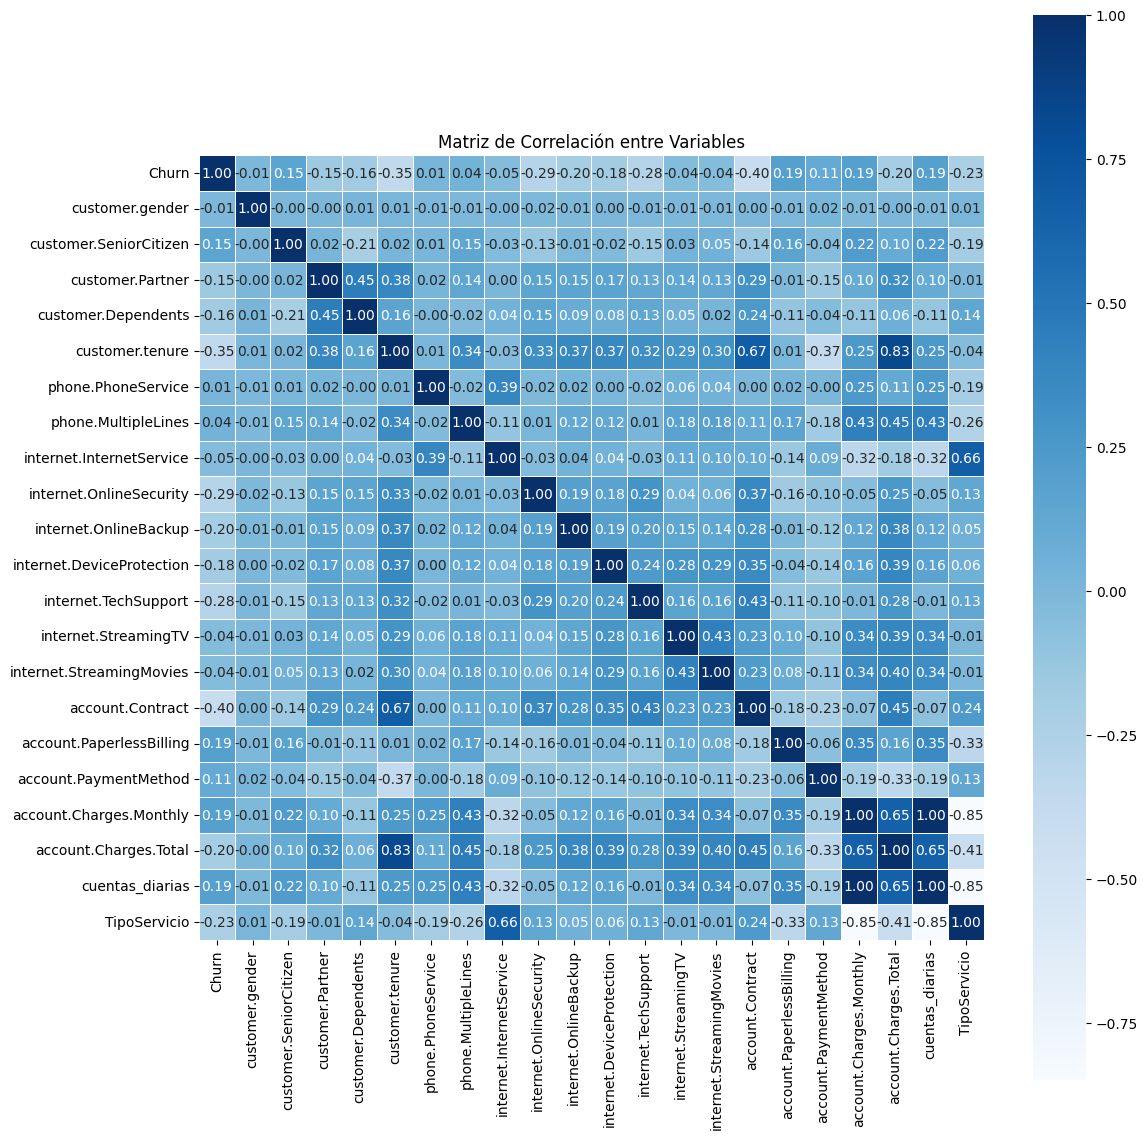

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Copia del dataframe
df_corr = df_churn.copy()

# Eliminar columnas no útiles para correlación
df_corr.drop(columns=['customerID'], inplace=True)

# Codificar variables categóricas
label_encoder = LabelEncoder()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

# Imputar valores nulos si los hay (por seguridad)
df_corr.fillna(df_corr.median(numeric_only=True), inplace=True)

# Calcular matriz de correlación
matriz_correlacion = df_corr.corr()

# Graficar heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, square=True)
plt.title("Matriz de Correlación entre Variables", fontsize=12)
plt.tight_layout()
plt.savefig('Matriz_correlación_entre_variables.png', dpi=120)
plt.show()
